In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, accuracy_score

In [2]:
curve = np.load("Precision_Recall_Curve.npy", allow_pickle = True).item()
print(curve)

{'Precision': array([0.32672371, 0.32672105, 0.32672234, ..., 1.        , 1.        ,
       1.        ]), 'Recall': array([1.00000000e+00, 9.99987903e-01, 9.99987903e-01, ...,
       2.41937435e-05, 1.20968717e-05, 0.00000000e+00]), 'Thresholds': array([9.1100346e-06, 9.1100437e-06, 9.1101474e-06, ..., 9.9999607e-01,
       9.9999666e-01, 9.9999750e-01], dtype=float32)}


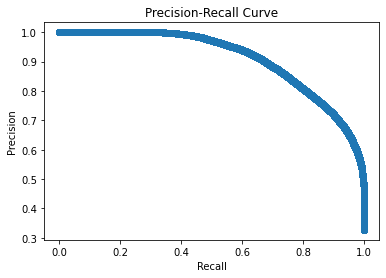

In [3]:
plt.figure()
plt.scatter(curve['Recall'], curve['Precision'])
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision');

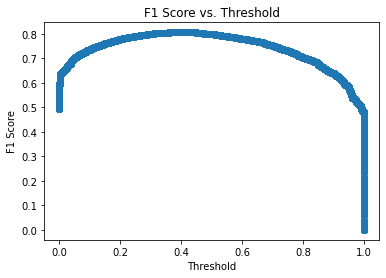

In [4]:
f1_scores = 2  / (1 / curve['Recall'][:-1] + 1 / curve['Precision'][:-1])

plt.figure()
plt.scatter(curve['Thresholds'], f1_scores)
plt.title('F1 Score vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('F1 Score');

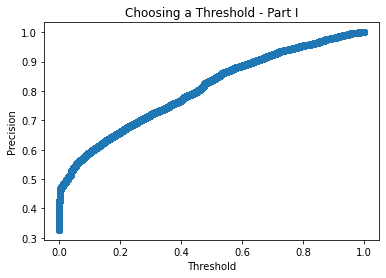

In [5]:
plt.figure()
plt.scatter(curve['Thresholds'], curve['Precision'][:-1])
plt.title('Choosing a Threshold - Part I')
plt.xlabel('Threshold')
plt.ylabel('Precision');

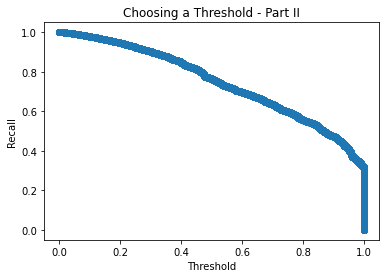

In [6]:
plt.figure()
plt.scatter(curve['Thresholds'], curve['Recall'][:-1])
plt.title('Choosing a Threshold - Part II')
plt.xlabel('Threshold')
plt.ylabel('Recall');

In [7]:
curve['Thresholds'][np.argmax(f1_scores)]

0.404996

In [8]:
predicted = np.load("Predictions.npy", allow_pickle = True)
actual = np.load("Actual.npy", allow_pickle = True)
print(predicted[0], actual[0])

[6.8475020e-01 3.7976723e-02 1.8599859e-02 6.9188341e-02 5.9317192e-04
 5.7734442e-01 1.4878663e-01 3.6901813e-02 5.3191691e-04 1.2657288e-01
 3.4441021e-01 3.3072457e-01 6.4701302e-04 3.0864242e-02 1.7696112e-01
 4.0384901e-01 4.2101866e-04 3.6424447e-02 1.4025846e-01 1.8468423e-01
 9.9138759e-08 9.9138759e-08 9.9138759e-08 9.9138759e-08 9.9138759e-08
 9.9138759e-08 9.9138759e-08 9.9138759e-08 9.9138759e-08 9.9138759e-08] [1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [9]:
compton = np.load("Compton.npy", allow_pickle = True)
print(compton[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [10]:
types = np.load("Types.npy", allow_pickle = True)
print(types[0])

[b'gg' b'\x00\xc0\x00?' b'' b'\x00\x00\x01?' b'' b'gg' b'' b'\x00@\x01?'
 b'' b'\x00\xa0\x01?' b'gg' b'\x00\xc0\x08?' b'' b'\x00\xc0$?' b'' b'gg'
 b'' b'\x00\xc8&?' b'' b'\x00\xc8,?']


In [34]:
filt_pred = []
filt_act = []

for i in range(len(predicted)):
    mask = compton[i].astype(int)
    mask = np.pad(mask, [(0, len(predicted[i]) - len(mask))], mode = 'constant').astype(bool)
    filt_pred.append(predicted[i][mask])
    filt_act.append(actual[i][mask])

print(filt_pred[0], filt_act[0])

[] []


In [12]:
filt_type = []

for i in range(len(predicted)):
    mask = compton[i].astype(int).astype(bool)
    filt_type.append(types[i][mask])

print(filt_type[0])

[]


In [13]:
print(set([len(typ) for typ in filt_type]))

{0}


In [25]:
#new_precisions, new_recalls, new_thresholds = precision_recall_curve(np.hstack(np.array(filt_act)), 
#                                                                     np.hstack(np.array(filt_pred)))

In [26]:
#plt.figure()
#plt.scatter(new_thresholds, new_recalls[:-1])
#plt.title('Recall of Intial Tracks')
#plt.xlabel('Threshold')
#plt.ylabel('Recall');

In [16]:
unpad_pred = []
unpad_act = []
mean_acc = 0

for i in range(len(predicted)):
    orig_pred = predicted[i][:len(compton[i])]
    orig_act = actual[i][:len(compton[i])]
    unpad_pred.append(orig_pred)
    unpad_act.append(orig_act)
    mean_acc += accuracy_score(orig_pred >= 0.5, orig_act)

print(mean_acc / len(predicted))

0.9269899140211859


In [17]:
compare_pred = [1.0 * (unpad >= 0.4) for unpad in unpad_pred]
print(compare_pred[0], unpad_act[0])

[1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] [1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [18]:
accuracies = [accuracy_score(*pair) for pair in zip(compare_pred, unpad_act)]
print(np.mean(accuracies))

0.9227763787138787


In [19]:
filt_pred_new = [1.0 * (filt >= 0.4) for filt in filt_pred]
print(filt_pred_new[0], filt_act[0])

[] []


In [27]:
filt_act = [filt for filt in filt_act if len(filt) > 0]
filt_pred_new = [filt for filt in filt_pred_new if len(filt) > 0]
filt_accs = [accuracy_score(*pair) for pair in zip(filt_pred_new, filt_act)]
#print(np.mean(filt_accs))

In [28]:
#plt.hist(filt_accs)
#plt.title('Distribution of Accuracies for Initial Tracks');

In [31]:
# elec_acc_list = [filt_p[0] == filt_a[0] for (filt_p, filt_a) in zip(filt_pred_new, filt_act)]
gamma_acc_list = [filt_p[1] == filt_a[1] if len(filt_p) >= 2 else False for (filt_p, filt_a) in zip(filt_pred_new, filt_act)]

# elec_acc = sum(elec_acc_list) / len(elec_acc_list)
# print(elec_acc)
#gamma_acc = sum(gamma_acc_list) / len(gamma_acc_list)
#print(gamma_acc)

In [29]:
def calc_rates(predicted, actual):
    
    TP = FP = TN = FN = 0

    for i in range(len(predicted)): 
        pred, act = predicted[i], actual[i]
        
        for j in range(len(pred)):
            if act[j] == pred[j] == 1:
                TP += 1
            if pred[j] == 1 and act[j] != pred[j]:
                FP += 1
            if act[j] == pred[j] == 0:
                TN += 1
            if pred[j] == 0 and act[j] != pred[j]:
                FN += 1
    
    return TP / (TP + FN), FN / (TP + FN)

In [36]:
calc_rates(compare_pred, unpad_act)

(0.8475189316042872, 0.15248106839571288)